In [ ]:
!pip install pycaret[full]
! pip install pyod
! pip install --upgrade scipy

# (1) Understanding Data: Full Data Analysis

In [ ]:
import time

# Record the start time
start_time = time.time()

#Get the data and make a full report
from pycaret.datasets import get_data
data= get_data('well',profile=True)

# Record the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = (end_time - start_time)/60
print(f"Running time: {elapsed_time} Minutes")



# Remove Zeros in the target

In [12]:
target_column_name = data.columns[-1]  # Assuming the target column is the last column
# Filter rows where the target column is not equal to 0
data = data[data[target_column_name] != 0].copy()
data.to_csv('well.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target columns
features = data.columns


# Create a subplot grid for all variables
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 6 * len(features)))

# Create distribution plots for all variables
for i, column in enumerate(features):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}", fontsize=14, weight='bold')
    axes[i].set_xlabel(column, fontsize=12, weight='bold')
    axes[i].set_ylabel("Frequency", fontsize=12, weight='bold')
    axes[i].tick_params(axis='both', which='both', labelsize=10, width=2)
    axes[i].spines['bottom'].set_linewidth(2)
    axes[i].spines['left'].set_linewidth(2)
    axes[i].spines['top'].set_linewidth(2)
    axes[i].spines['right'].set_linewidth(2)
    axes[i].xaxis.label.set_fontsize(12)
    axes[i].xaxis.label.set_weight('bold')
    axes[i].yaxis.label.set_fontsize(12)
    axes[i].yaxis.label.set_weight('bold')
    axes[i].grid(False)
    # Make axis numbers bold
    for tick in axes[i].get_xticklabels() + axes[i].get_yticklabels():
        tick.set_fontweight('bold')
plt.tight_layout()
plt.show()


In [33]:
# decribe the data
data = pd.read_csv('well.csv')
data.describe().round(2)


,Depth (ft),Weight on bit (k-lbs),Temperature Out (deg F),Temperature In(deg F),Pit Total (bbls),Pump Pressure (psi),Hook load (k-lbs),Surface Torque (psi),Rotary Speed (rpm),Flow In (gal/min),Flow Out Percentage (%),ROP (ft/hr)
count,7305.00,7305.00,7305.00,7305.00,7305.00,7305.00,7305.00,7305.00,7305.00,7305.00,7305.00,7305.00
mean,3837.25,23.12,126.07,118.32,236.93,1267.27,81.30,131.04,54.95,716.21,79.70,41.64
std,2146.88,9.11,12.26,11.93,18.24,490.21,26.51,48.66,25.93,141.46,11.90,67.73
min,85.18,0.00,84.07,85.00,170.91,19.94,27.27,0.00,0.00,0.00,0.69,0.71
25%,1972.93,18.31,116.13,108.87,224.54,665.78,54.72,117.09,38.09,620.26,72.65,11.41
50%,3854.86,23.83,124.86,117.22,238.11,1432.67,80.24,140.35,50.38,700.16,80.71,17.99
75%,5693.10,29.68,136.49,126.86,249.56,1669.68,105.63,157.28,75.95,824.55,88.84,44.34
max,7536.25,47.05,151.70,146.31,279.88,2200.43,148.93,273.71,271.58,3317.51,111.21,901.44


In [ ]:
# Create a pair plot with coloring based on the specified variable
sns.set(style="ticks")
sns.pairplot(data)  # You can specify a different color palette if needed
# Show the plot
plt.show()

In [ ]:
# Define a method to show the log of the drilling parameters
def make_log_plot(well_data):
    # Sort logs by depth
    well_data = data.sort_values(by='Depth (ft)')
    
    # Set top and bottom of the plot
    ztop = well_data['Depth (ft)'].min()
    zbot = well_data['Depth (ft)'].max()
    
    # Create subplots
    fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(16, 24))
    
    # Plot some of the well log data
    ax[0].plot(well_data['Weight on bit (k-lbs)'], well_data['Depth (ft)'], '-', color='green')
    ax[1].plot(well_data['Temperature In(deg F)'], well_data['Depth (ft)'], '-', color='brown')
    ax[2].plot(well_data['Pump Pressure (psi)'], well_data['Depth (ft)'], '-', color='orange')
    ax[3].plot(well_data['Hook load (k-lbs)'], well_data['Depth (ft)'], '-', color='teal')
    ax[4].plot(well_data['Surface Torque (psi)'], well_data['Depth (ft)'], '-', color='lime')
    ax[5].plot(well_data['Rotary Speed (rpm)'], well_data['Depth (ft)'], '-', color='cyan')
    ax[6].plot(well_data['Flow In (gal/min)'], well_data['Depth (ft)'], '-', color='pink')
    ax[7].plot(well_data['ROP (ft/hr)'], well_data['Depth (ft)'], '-', color='purple')

    for i in range(len(ax)-0):
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x')
        
        ax[i].xaxis.label.set_fontsize(12)
        ax[i].xaxis.label.set_fontweight('bold')
        ax[i].xaxis.set_tick_params(labelsize=10)
        
        ax[i].yaxis.label.set_fontsize(12)
        ax[i].yaxis.label.set_fontweight('bold')
        ax[i].yaxis.set_tick_params(labelsize=10)
    
        # Move x-axis labels to the top
        ax[i].xaxis.tick_top() 
        # Set x-axis label at the top
        ax[i].xaxis.set_label_position('top')

        ax[0].tick_params(axis='y', labelleft=False)
        ax[0].set_ylabel("Depth (ft)", fontsize=12, weight='bold')
        
        ax[0].set_xlabel("WOB(k-lbs)", fontsize=12, weight='bold')
        ax[0].set_xlim(well_data['Weight on bit (k-lbs)'].min(), well_data['Weight on bit (k-lbs)'].max())
        ax[1].set_xlabel("Temp In(F)", fontsize=12, weight='bold')
        ax[1].set_xlim(well_data['Temperature In(deg F)'].min(), well_data['Temperature In(deg F)'].max())

        ax[2].set_xlabel("Pump Pressure(psi)", fontsize=12, weight='bold')
        ax[2].set_xlim(well_data['Pump Pressure (psi)'].min(), well_data['Pump Pressure (psi)'].max())
        ax[3].set_xlabel("Hook load(k-lbs)", fontsize=12, weight='bold')
        ax[3].set_xlim(well_data['Hook load (k-lbs)'].min(), well_data['Hook load (k-lbs)'].max())
        ax[4].set_xlabel("Torque(psi)", fontsize=12, weight='bold')
        ax[4].set_xlim(well_data['Surface Torque (psi)'].min(), well_data['Surface Torque (psi)'].max())
        ax[5].set_xlabel("Rotary Speed(rpm)", fontsize=12, weight='bold')
        ax[5].set_xlim(well_data['Rotary Speed (rpm)'].min(), well_data['Rotary Speed (rpm)'].max())
        ax[6].set_xlabel("Flow In(gal/min)", fontsize=12, weight='bold')
        ax[6].set_xlim(well_data['Flow In (gal/min)'].min(), well_data['Flow In (gal/min)'].max())
        ax[7].set_xlabel("ROP(ft/hr)", fontsize=12, weight='bold')
        ax[7].set_xlim(well_data['ROP (ft/hr)'].min(), well_data['ROP (ft/hr)'].max())
        ax[7].set_xscale('log')

        ax[0].set_yticklabels([])
        ax[1].set_yticklabels([])
        ax[2].set_yticklabels([])
        ax[3].set_yticklabels([])
        ax[4].set_yticklabels([])
        ax[5].set_yticklabels([])
        ax[6].set_yticklabels([])
        ax[7].set_yticklabels([])
    
    # Add zoom functionality
    plt.subplots_adjust(wspace=0)
    plt.show()
# Call the function with your well_data
make_log_plot(data)
  

# (2) Data Prepocessing: Remove Zeros Values
   #                 (Optional but not used)

In [73]:
# Step 1: Drop rows with NaN or zero values
data_no_zeros = data[(data[features] != 0).all(axis=1)]
data_no_zeros = data_no_zeros.dropna()
# Step 2: Save the cleaned data to a new CSV file
data_no_zeros.to_csv('data_no_zeros.csv', index=False)

# (2) Data Prepocessing: Remove the Noise

# ML Algorithms

In [35]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from pyod.models.knn import KNN
from pyod.models.mcd import MCD
from pyod.models.hbos import HBOS
from pyod.models.abod import ABOD
from sklearn.covariance import EllipticEnvelope
from pyod.models.auto_encoder import AutoEncoder  # Add the import for AutoEncoder

# Step 1: User chooses the outlier removal algorithm
print("Choose an outlier removal algorithm:")
print("1. Isolation Forest")
print("2. Local Outlier Factor")
print("3. One-Class SVM")
print("4. DBSCAN (Cluster-Based)")
print("5. K-Nearest Neighbors (KNN)")
print("6. Minimum Covariance Determinant (MCD)")
print("7. Elliptic Envelope")
print("8. Angle-based Outlier Detector (ABOD)")
print("9. Histogram-based Outlier Detection (HBOS)")
print("10. AutoEncoder (AE)")
choice = int(input("Enter the number of your choice: "))

# Load your own dataset from a CSV file
data = pd.read_csv("well.csv")  # or choose 'data_no_zeros.csv' if you decided to remove zeros

# Define your features and target_column_name
features = data.columns[:-1]  # Assuming the target column is the last one
target_column_name = data.columns[-1]

# Step 2: User chooses the contamination level
contamination_values = [0.05, 0.10, 0.15, 0.20, 0.25]
print("\nChoose the contamination level (percentage of outliers to be removed):")
for i, contamination in enumerate(contamination_values, start=1):
    print(f"{i}. {contamination * 100}%")
contamination_choice = int(input("Enter the number of your choice: ")) - 1
contamination = contamination_values[contamination_choice]

# Initialize outlier detection models
if choice == 1:
    model = IsolationForest(contamination=contamination, n_estimators=500, bootstrap=True, random_state=42)
elif choice == 2:
    model = LocalOutlierFactor(contamination=contamination, n_neighbors=20)
elif choice == 3:
    model = OneClassSVM(nu=contamination)
elif choice == 4:
    model = DBSCAN(eps=0.5, min_samples=5, p=2)
elif choice == 5:
    model = KNN(contamination=contamination, n_neighbors=3, method='mean', radius=0.05)
elif choice == 6:
    model = MCD(contamination=contamination, assume_centered=False, support_fraction=0.1, random_state=42)
elif choice == 7:
    model = EllipticEnvelope(contamination=contamination)
elif choice == 8:
    model = ABOD(contamination=contamination, n_neighbors=3, method='fast')
elif choice == 9:
    model = HBOS(contamination=contamination)
elif choice == 10:
    model = AutoEncoder(contamination=contamination)

# Combine features and target for outlier detection
X = data[features].copy()  # Use only the features
X[target_column_name] = data[target_column_name]

# Predict outliers on the test set
y_pred = model.fit_predict(X)

# Filter the data to keep non-outliers
data_no_outliers = data[y_pred != -1]

# Step 3: Save the data with outliers removed to a CSV file
data_no_outliers.to_csv('data_no_outliers.csv', index=False)


Choose an outlier removal algorithm:
1. Isolation Forest
2. Local Outlier Factor
3. One-Class SVM
4. DBSCAN (Cluster-Based)
5. K-Nearest Neighbors (KNN)
6. Minimum Covariance Determinant (MCD)
7. Elliptic Envelope
8. Angle-based Outlier Detector (ABOD)
9. Histogram-based Outlier Detection (HBOS)
10. AutoEncoder (AE)
Enter the number of your choice: 1

Choose the contamination level (percentage of outliers to be removed):
1. 5.0%
2. 10.0%
3. 15.0%
4. 20.0%
5. 25.0%
Enter the number of your choice: 2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize boxplots for each feature before and after outlier removal
plt.figure(figsize=(15, 16))
plt.suptitle('Boxplots Before and After Outlier Removal', fontsize=14, weight='bold')

features = data.columns


# Create a subplot for each feature
for i, feature in enumerate(features, start=1):
    plt.subplot(12, 2, (i * 2) - 1)
    sns.boxplot(x=data[feature])
    plt.title(f'Before Outlier Removal - {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12, weight='bold')
    plt.ylabel('Values', fontsize=12, weight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.subplot(12, 2, i * 2)
    sns.boxplot(x=data_no_outliers[feature])
    plt.title(f'After Outlier Removal - {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12, weight='bold')
    plt.ylabel('Values', fontsize=12, weight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

In [ ]:
# Call the function with your well_data
make_log_plot(data_no_outliers)

In [ ]:
def make_comparison_log_plot(*datasets):
    # Sort logs by depth for each dataset
    sorted_datasets = [dataset.sort_values(by='Depth (ft)') for dataset in datasets]
    
    # Set top and bottom of the plot based on the first dataset
    ztop = sorted_datasets[0]['Depth (ft)'].min()
    zbot = sorted_datasets[0]['Depth (ft)'].max()
    
    # Create subplots
    fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(16, 24))
    
    # Plot well log data for each dataset
    for i, dataset in enumerate(sorted_datasets):

        # Plot well log data
        ax[0].plot(dataset['Weight on bit (k-lbs)'], dataset['Depth (ft)'], '-', label=f'Dataset {i + 1}')
        ax[1].plot(dataset['Temperature In(deg F)'], dataset['Depth (ft)'], '-', label=f'Dataset {i + 1}')
        ax[2].plot(dataset['Pump Pressure (psi)'], dataset['Depth (ft)'], '-', label=f'Dataset {i + 1}')
        ax[3].plot(dataset['Hook load (k-lbs)'], dataset['Depth (ft)'], '-', label=f'Dataset {i + 1}')
        ax[4].plot(dataset['Surface Torque (psi)'], dataset['Depth (ft)'], '-', label=f'Dataset {i + 1}')
        ax[5].plot(dataset['Rotary Speed (rpm)'], dataset['Depth (ft)'], '-', label=f'Dataset {i + 1}')
        ax[6].plot(dataset['Flow In (gal/min)'], dataset['Depth (ft)'], '-', label=f'Dataset {i + 1}')
        ax[7].plot(dataset['ROP (ft/hr)'], dataset['Depth (ft)'], '-', label=f'Dataset {i + 1}')

    for i in range(len(ax)):
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x')
        # Move x-axis labels to the top
        ax[i].xaxis.tick_top() 
        # Set x-axis label at the top
        ax[i].xaxis.set_label_position('top')
        
        ax[i].xaxis.label.set_fontsize(12)
        ax[i].xaxis.label.set_fontweight('bold')
        ax[i].xaxis.set_tick_params(labelsize=10)
        
        ax[i].yaxis.label.set_fontsize(12)
        ax[i].yaxis.label.set_fontweight('bold')
        ax[i].yaxis.set_tick_params(labelsize=10)

        ax[0].tick_params(axis='y', labelleft=False)
        ax[0].set_ylabel("Depth (ft)")
        
        ax[0].set_xlabel("WOB(k-lbs)", fontsize=12, weight='bold')
        ax[0].set_xlim(dataset['Weight on bit (k-lbs)'].min(), dataset['Weight on bit (k-lbs)'].max())
        ax[1].set_xlabel("Temp In(F)", fontsize=12, weight='bold')
        ax[1].set_xlim(dataset['Temperature In(deg F)'].min(), dataset['Temperature In(deg F)'].max())

        ax[2].set_xlabel("Pump Pressure(psi)", fontsize=12, weight='bold')
        ax[2].set_xlim(dataset['Pump Pressure (psi)'].min(), dataset['Pump Pressure (psi)'].max())
        ax[3].set_xlabel("Hook load(k-lbs)", fontsize=12, weight='bold')
        ax[3].set_xlim(dataset['Hook load (k-lbs)'].min(), dataset['Hook load (k-lbs)'].max())
        ax[4].set_xlabel("Torque(psi)", fontsize=12, weight='bold')
        ax[4].set_xlim(dataset['Surface Torque (psi)'].min(), dataset['Surface Torque (psi)'].max())
        ax[5].set_xlabel("Rotary Speed(rpm)", fontsize=12, weight='bold')
        ax[5].set_xlim(dataset['Rotary Speed (rpm)'].min(), dataset['Rotary Speed (rpm)'].max())
        ax[6].set_xlabel("Flow In(gal/min)", fontsize=12, weight='bold')
        ax[6].set_xlim(dataset['Flow In (gal/min)'].min(), dataset['Flow In (gal/min)'].max())
        ax[7].set_xlabel("ROP(ft/hr)", fontsize=12, weight='bold')
        ax[7].set_xlim(dataset['ROP (ft/hr)'].min(), dataset['ROP (ft/hr)'].max())
        ax[7].set_xscale('log')

        ax[0].set_yticklabels([])
        ax[1].set_yticklabels([])
        ax[2].set_yticklabels([])
        ax[3].set_yticklabels([])
        ax[4].set_yticklabels([])
        ax[5].set_yticklabels([])
        ax[6].set_yticklabels([])
        ax[7].set_yticklabels([])

    ax[0].tick_params(axis='y', labelleft=False)
    ax[0].set_ylabel("Depth (ft)")

    # Add a legend to distinguish between datasets
    ax[0].legend()

    # Add zoom functionality
    plt.subplots_adjust(wspace=0)
    plt.show()

# Call the function with your datasets
make_comparison_log_plot(data, data_no_outliers)


# IQR

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your own dataset from a CSV file
data = pd.read_csv("well.csv") 

# Features and target columns
features = data.columns

def remove_outliers_iqr(data, features):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each feature
    Q1 = data[features].quantile(0.25)
    Q3 = data[features].quantile(0.75)

    # Calculate the IQR for each feature
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each feature
    outliers = ((data[features] < lower_bound) | (data[features] > upper_bound)).any(axis=1)

    # Filter the data to keep non-outliers
    data_no_outliers = data[~outliers]
    return data_no_outliers

# Assign the result of the function to data_no_outliers
data_no_outliers = remove_outliers_iqr(data, features)

# Step 3: Save the data with outliers removed to a CSV file
data_no_outliers.to_csv('data_no_outliers.csv', index=False)

# Visualize boxplots for each feature before and after outlier removal
plt.figure(figsize=(15, 16))
plt.suptitle('Boxplots Before and After Outlier Removal (IQR Method)', fontsize=font_size_title, weight='bold')

# Create a subplot for each feature
for i, feature in enumerate(features, start=1):
    plt.subplot(12, 2, (i * 2) - 1)
    sns.boxplot(x=data[feature])
    plt.title(f'Before Outlier Removal - {feature}', fontsize=16, weight='bold')
    plt.xlabel(feature, fontsize=12, weight='bold')
    plt.ylabel('Values', fontsize=12, weight='bold')
    plt.xticks(fontsize=font_size_tick_labels)
    plt.yticks(fontsize=font_size_tick_labels)

    plt.subplot(12, 2, i * 2)
    sns.boxplot(x=data_no_outliers[feature])
    plt.title(f'After Outlier Removal - {feature}', fontsize=font_size_labels, weight='bold')
    plt.xlabel(feature, fontsize=font_size_labels, weight='bold')
    plt.ylabel('Values', fontsize=font_size_labels, weight='bold')
    plt.xticks(fontsize=font_size_tick_labels)
    plt.yticks(fontsize=font_size_tick_labels)

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()


In [ ]:
# Call the function with your well_data
make_log_plot(data_no_outliers)

In [ ]:
# Call the function with your datasets
make_comparison_log_plot(data, data_no_outliers)

In [ ]:
# Analysis after removing outliers
from pycaret.datasets import get_data
data= get_data('data_no_outliers',profile=True)

# PairPlots

In [ ]:
# Load your own dataset from a CSV file
data = pd.read_csv("data_no_outliers.csv")
# Create a pair plot
sns.set(style="ticks")
sns.pairplot(data)

# Show the plot
plt.show()

# (2) Data Prepocessing: Checking Different Scalling techniques


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create distribution plots for the scaled training data
for column in X_train_s.columns:
    plt.figure(figsize=(12, 8))
    plt.title(f"Distribution of {column} - Scaled Training Data", fontsize=16, weight='bold')

    sns.histplot(data=X_train_s, x=column, kde=True, label=column, element="step", common_norm=False)

    plt.xlabel("Value", fontsize=12, weight='bold')
    plt.ylabel("Frequency", fontsize=12, weight='bold')
    plt.xticks(fontsize=10, weight='bold')
    plt.yticks(fontsize=10, weight='bold')
    plt.gca().spines['top'].set_linewidth(2)  # Set linewidth for the top frame
    plt.gca().spines['right'].set_linewidth(2)  # Set linewidth for the right frame
    plt.gca().spines['bottom'].set_linewidth(2)  # Set linewidth for the bottom frame
    plt.gca().spines['left'].set_linewidth(2)  # Set linewidth for the left frame
    plt.show()
# Create distribution plots for the scaled test data
for column in X_test_s.columns:
    plt.figure(figsize=(12, 8))
    plt.title(f"Distribution of {column} - Scaled Training Data", fontsize=16, weight='bold')

    sns.histplot(data=X_train_s, x=column, kde=True, label=column, element="step", common_norm=False)

    plt.xlabel("Value", fontsize=12, weight='bold')
    plt.ylabel("Frequency", fontsize=12, weight='bold')
    plt.xticks(fontsize=10, weight='bold')
    plt.yticks(fontsize=10, weight='bold')
    plt.gca().spines['top'].set_linewidth(2)  # Set linewidth for the top frame
    plt.gca().spines['right'].set_linewidth(2)  # Set linewidth for the right frame
    plt.gca().spines['bottom'].set_linewidth(2)  # Set linewidth for the bottom frame
    plt.gca().spines['left'].set_linewidth(2)  # Set linewidth for the left frame
    plt.show()

# Checking Feature Importnace

In [182]:
from pycaret.datasets import get_data
dataset= get_data('well',profile= False)

,Depth (ft),Weight on bit (k-lbs),Temperature Out (deg F),Temperature In(deg F),Pit Total (bbls),Pump Pressure (psi),Hook load (k-lbs),Surface Torque (psi),Rotary Speed (rpm),Flow In (gal/min),Flow Out Percentage (%),ROP (ft/hr)
0,85.18,0.0,93.49,90.87,274.83,463.72,31.77,8.93,151.09,1109.58,101.61,56.80
1,86.18,0.0,93.52,90.83,274.83,459.53,31.01,8.93,151.09,1108.36,101.70,61.14
2,87.23,0.0,94.25,90.91,273.80,454.57,31.01,9.01,61.54,1102.87,96.81,18.58
3,88.26,0.0,94.44,91.14,273.79,451.14,31.16,8.97,60.23,1101.04,96.67,38.29
4,89.36,0.0,94.48,91.18,273.80,456.09,31.54,8.97,61.75,1102.46,96.63,394.38


In [183]:
data = dataset.sample(frac=0.9)    # frac is the percent of spliting
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (6574, 12)
Unseen Data For Predictions: (731, 12)


In [ ]:

from pycaret.regression import *
exp_reg101 = setup(data = data,
                   target = 'ROP (ft/hr)',
                   train_size = 0.9,
                   session_id=123,
                   use_gpu= True,
                   fold =5,
                   fold_shuffle =True,
                   data_split_shuffle= True,
                   ignore_features= None,                #Optional[List[str]] = None,
                   keep_features= None,                  #Optional[List[str]] = None,

                   remove_multicollinearity= True,
                   multicollinearity_threshold = 0.8,
                   remove_outliers=True,
                   outliers_method = 'iforest',
                   outliers_threshold = 0.1,
                   imputation_type = None,
                   numeric_imputation= 'median',
                   transformation = True,
                   transformation_method = 'quantile',
                   normalize = True,
                   normalize_method = 'zscore',
                   transform_target= False,
                   pca = False,
                   pca_method='kernel',
                   pca_components = 5,   
                   
                   
                   polynomial_features =False,
                   polynomial_degree = 2,            # integer
                   low_variance_threshold = None,   # float

                   feature_selection = True,
                   # When set to True, a subset of features is selected based on a feature importance score determined by feature_selection_estimator.
                   #feature_selection_method: str = 'classic',
                   feature_selection_estimator = 'lightgbm',   #'et',
                   n_features_to_select = 0.9,
                   
                   
                   profile_kwargs=True,
                   )


In [ ]:
# Testing the feature importance based on the Extreme Tree algorithm
et = create_model('et',
                   fold =5,
                   return_train_score = False,
                   cross_validation = True,)

evaluate_model(et)

In [ ]:
# Testing the feature importance based on the Decision Tree algorithm
dt = create_model('dt',
                   fold = 5,
                   return_train_score = False,
                   cross_validation = True,
                  )

evaluate_model(dt)

In [ ]:
# Testing the feature importance based on the gradient Boosting algorithm
gbr = create_model('gbr',
                   fold = 5,
                   return_train_score = False,
                   cross_validation = True,
                  )
evaluate_model(gbr)

In [ ]:
# Testing the feature importance based on the Light gradient Boosting algorithm
lightgbm = create_model('lightgbm',
                   fold = 5,
                   return_train_score = False,
                   cross_validation = True,
                  )

evaluate_model(lightgbm)

In [ ]:
# Testing the feature importance based on the Extreme gradient Boosting algorithm
xgboost = create_model('xgboost',
                   fold = 5,
                   return_train_score = False,
                   cross_validation = True,
                  )

evaluate_model(xgboost)

# Features/Target Relationship

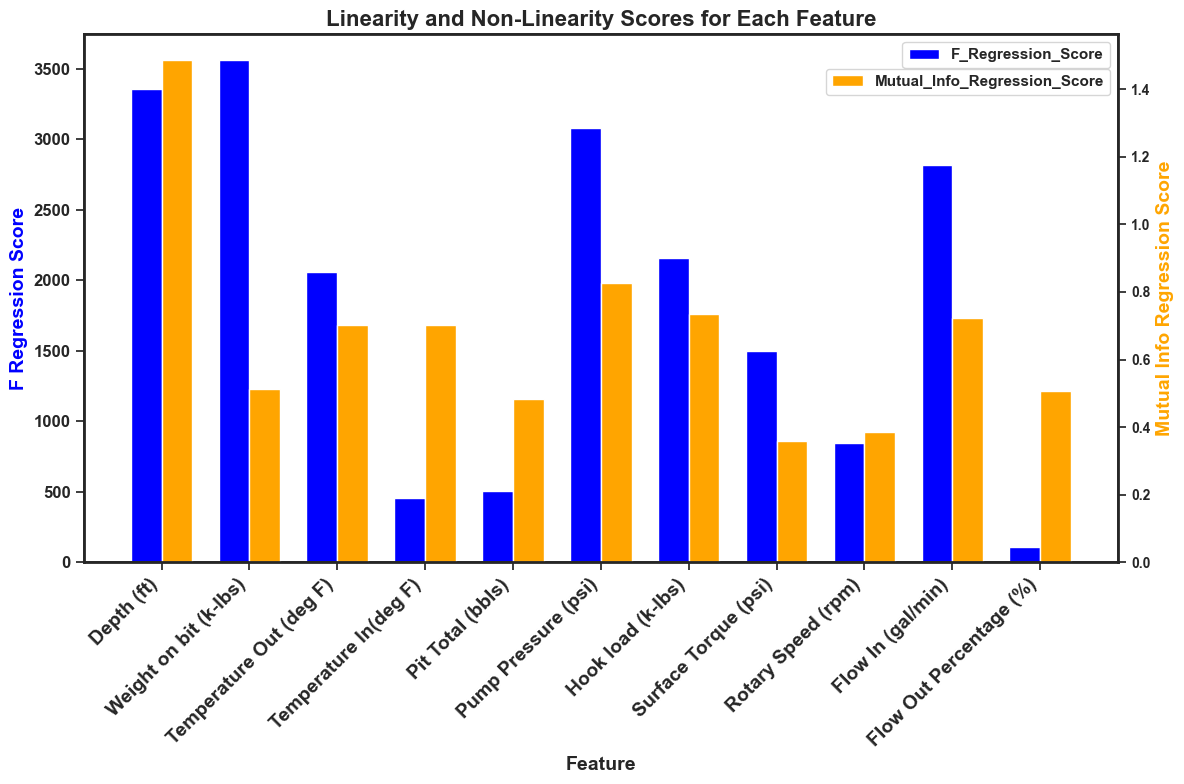

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

# Assume X and y are your input features and target variable
X = data.iloc[:, :-1]  # data_no_outliers
y = data.iloc[:, -1:]  # data_no_outliers

# Evaluate linearity using f_regression
f_regression_scores, _ = f_regression(X, y)

# Evaluate non-linearity using mutual_info_regression
mutual_info_regression_scores = mutual_info_regression(X, y)

# Create a DataFrame to store the scores
scores_df = pd.DataFrame({
    'Feature': X.columns,
    'F_Regression_Score': f_regression_scores,
    'Mutual_Info_Regression_Score': mutual_info_regression_scores
})

# Plot two bars for each feature with different colors
fig, ax1 = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(scores_df))

color1 = 'blue'
color2 = 'orange'

# Plot bars for F_Regression_Score on the first y-axis (ax1)
rects1 = ax1.bar(index, scores_df['F_Regression_Score'], bar_width, label='F_Regression_Score', color=color1)

# Create a second y-axis (ax2) sharing the same x-axis
ax2 = ax1.twinx()

# Plot bars for Mutual_Info_Regression_Score on the second y-axis (ax2)
rects2 = ax2.bar(index + bar_width, scores_df['Mutual_Info_Regression_Score'], bar_width, label='Mutual_Info_Regression_Score', color=color2)

# Labeling and formatting
ax1.set_xlabel('Feature', weight='bold', fontsize=14)
ax1.set_ylabel('F Regression Score', color=color1, weight='bold', fontsize=14)
ax2.set_ylabel('Mutual Info Regression Score', color=color2, weight='bold', fontsize=14)
ax1.set_title('Linearity and Non-Linearity Scores for Each Feature', weight='bold', fontsize=16)
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(scores_df['Feature'], rotation=45, ha='right', weight='bold', fontsize=14)

# Make y-axis tick labels bold
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(12)

for label in ax2.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(12)

# Position the legends below each other
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
legend2 = ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))
# Make legend font bold
legend1.get_texts()[0].set_weight('bold')
legend2.get_texts()[0].set_weight('bold')

# Remove grid
ax1.grid(False)
ax2.grid(False)

plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.gca().spines['top'].set_linewidth(2)  # Set linewidth for the top frame
plt.gca().spines['right'].set_linewidth(2)  # Set linewidth for the right frame
plt.gca().spines['bottom'].set_linewidth(2)  # Set linewidth for the bottom frame
plt.gca().spines['left'].set_linewidth(2)  # Set linewidth for the left frame

# Show plot
plt.tight_layout()
plt.show()


## How to interpret the scores

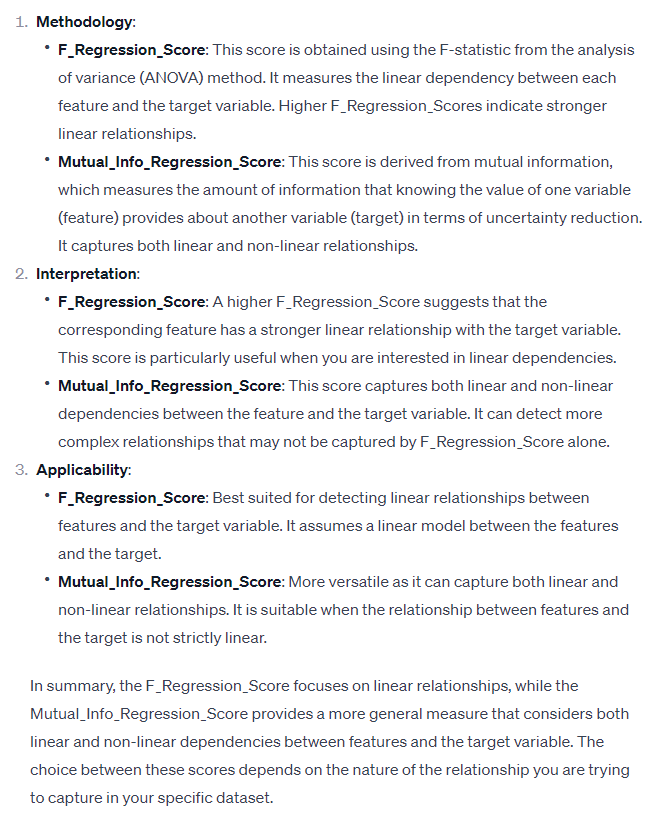

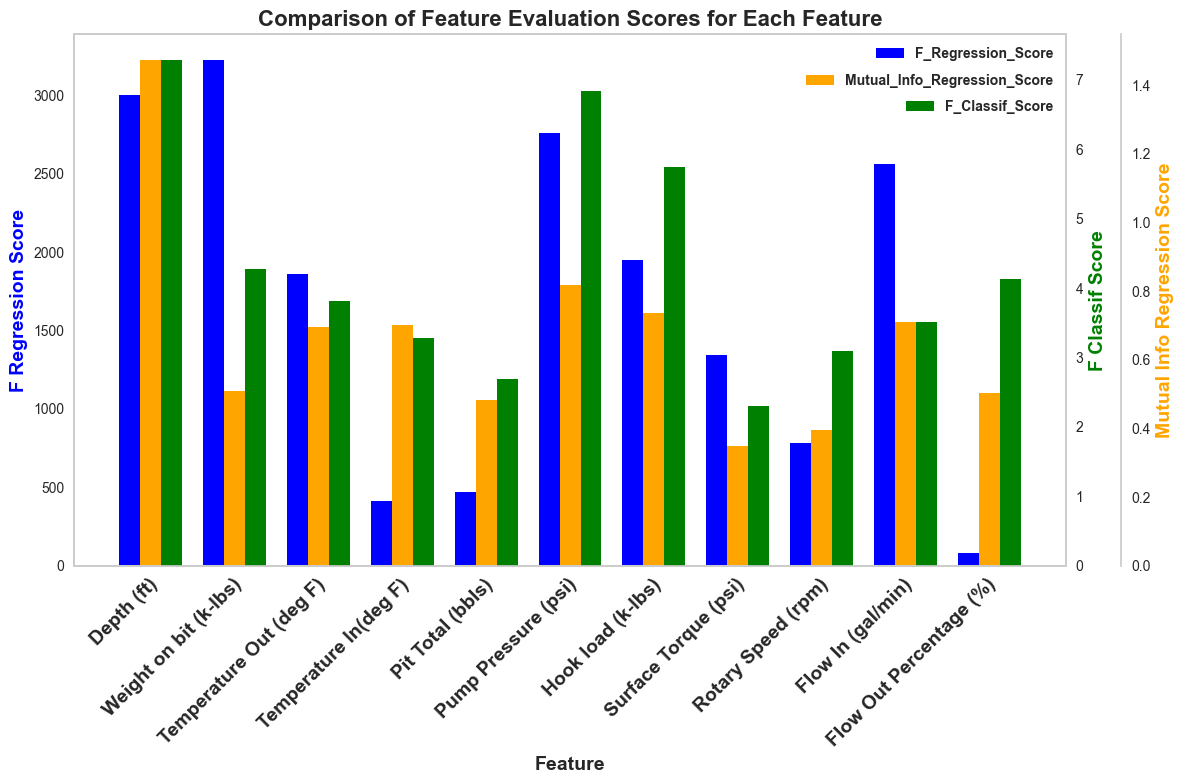

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression, f_classif

# Assume X and y are your input features and target variable

# Evaluate linearity using f_regression
f_regression_scores, _ = f_regression(X, y)

# Evaluate non-linearity using mutual_info_regression
mutual_info_regression_scores = mutual_info_regression(X, y)

# Evaluate significance in a classification context using f_classif
f_classif_scores, _ = f_classif(X, y)

# Create a DataFrame to store the scores
scores_df = pd.DataFrame({
    'Feature': X.columns,
    'F_Regression_Score': f_regression_scores,
    'Mutual_Info_Regression_Score': mutual_info_regression_scores,
    'F_Classif_Score': f_classif_scores
})

# Plot three bars for each feature with different colors
fig, ax1 = plt.subplots(figsize=(12, 8))
bar_width = 0.25
index = np.arange(len(scores_df))

color1 = 'blue'
color2 = 'orange'
color3 = 'green'

# Plot bars for F_Regression_Score on the first y-axis (ax1)
rects1 = ax1.bar(index, scores_df['F_Regression_Score'], bar_width, label='F_Regression_Score', color=color1)

# Create a second y-axis (ax2) sharing the same x-axis
ax2 = ax1.twinx()

# Plot bars for Mutual_Info_Regression_Score on the second y-axis (ax2)
rects2 = ax2.bar(index + bar_width, scores_df['Mutual_Info_Regression_Score'], bar_width, label='Mutual_Info_Regression_Score', color=color2)

# Create a third y-axis (ax3) sharing the same x-axis
ax3 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 40))  # Adjust the position to the right

# Plot bars for F_Classif_Score on the third y-axis (ax3)
rects3 = ax3.bar(index + 2 * bar_width, scores_df['F_Classif_Score'], bar_width, label='F_Classif_Score', color=color3)

# Labeling and formatting
ax1.set_xlabel('Feature',weight='bold', fontsize=14)
ax1.set_ylabel('F Regression Score', color=color1,weight='bold', fontsize=14)
ax2.set_ylabel('Mutual Info Regression Score', color=color2,weight='bold', fontsize=14)
ax3.set_ylabel('F Classif Score', color=color3, weight='bold', fontsize=14)
ax1.set_title('Comparison of Feature Evaluation Scores for Each Feature',weight='bold',fontsize=16)
ax1.set_xticks(index + 1.5 * bar_width)
ax1.set_xticklabels(scores_df['Feature'], rotation=45, ha='right',weight='bold', fontsize=14)

# Position the legends below each other
legend1=ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
legend2=ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))
legend3=ax3.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
# Make legend font bold
legend1.get_texts()[0].set_weight('bold')
legend2.get_texts()[0].set_weight('bold')
legend3.get_texts()[0].set_weight('bold')

# Remove grid
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

# Show plot
plt.tight_layout()
plt.show()


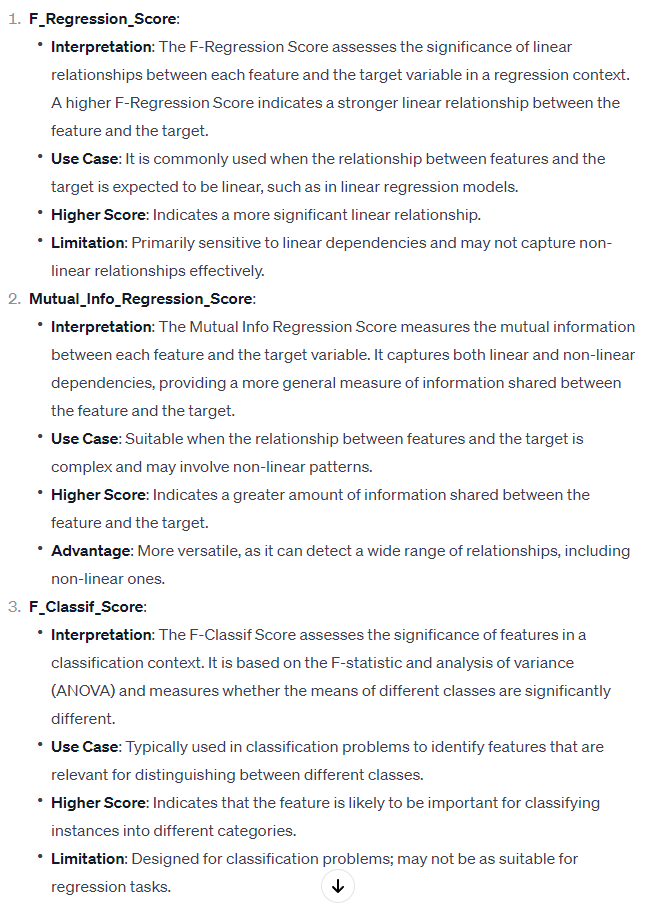